In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/winequality-red.csv")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

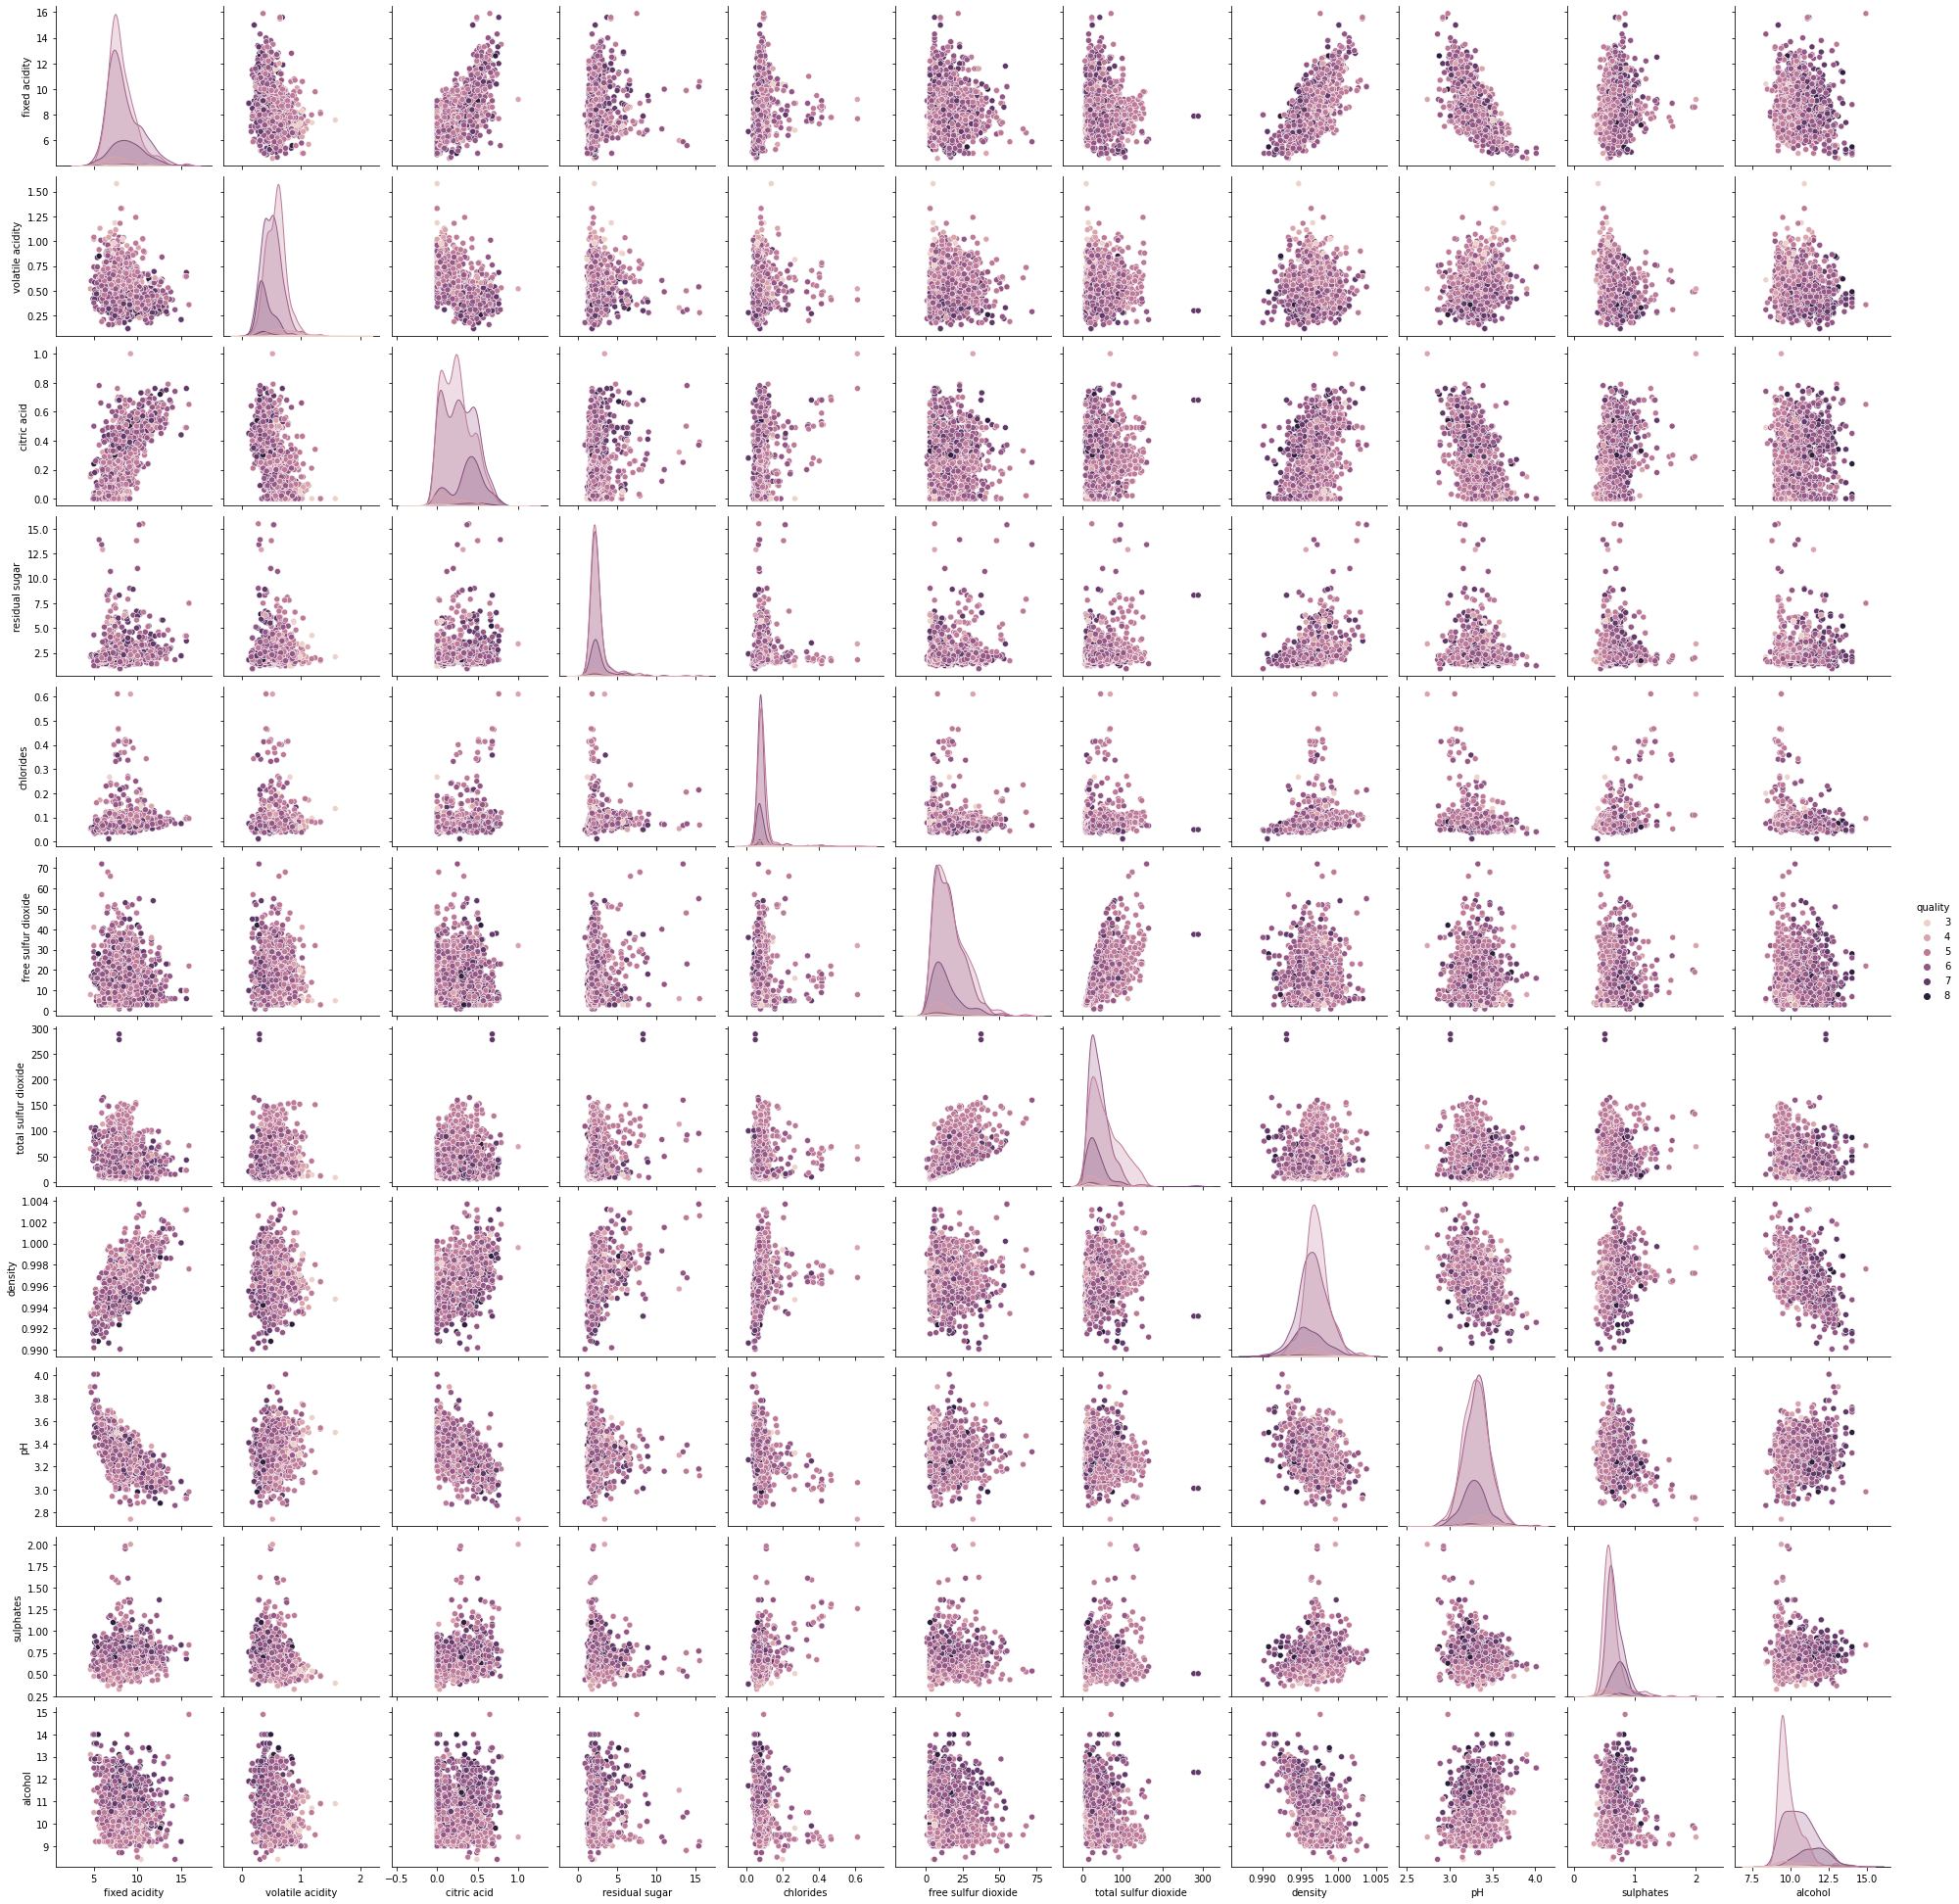

In [8]:
sns.pairplot(data,hue='quality')

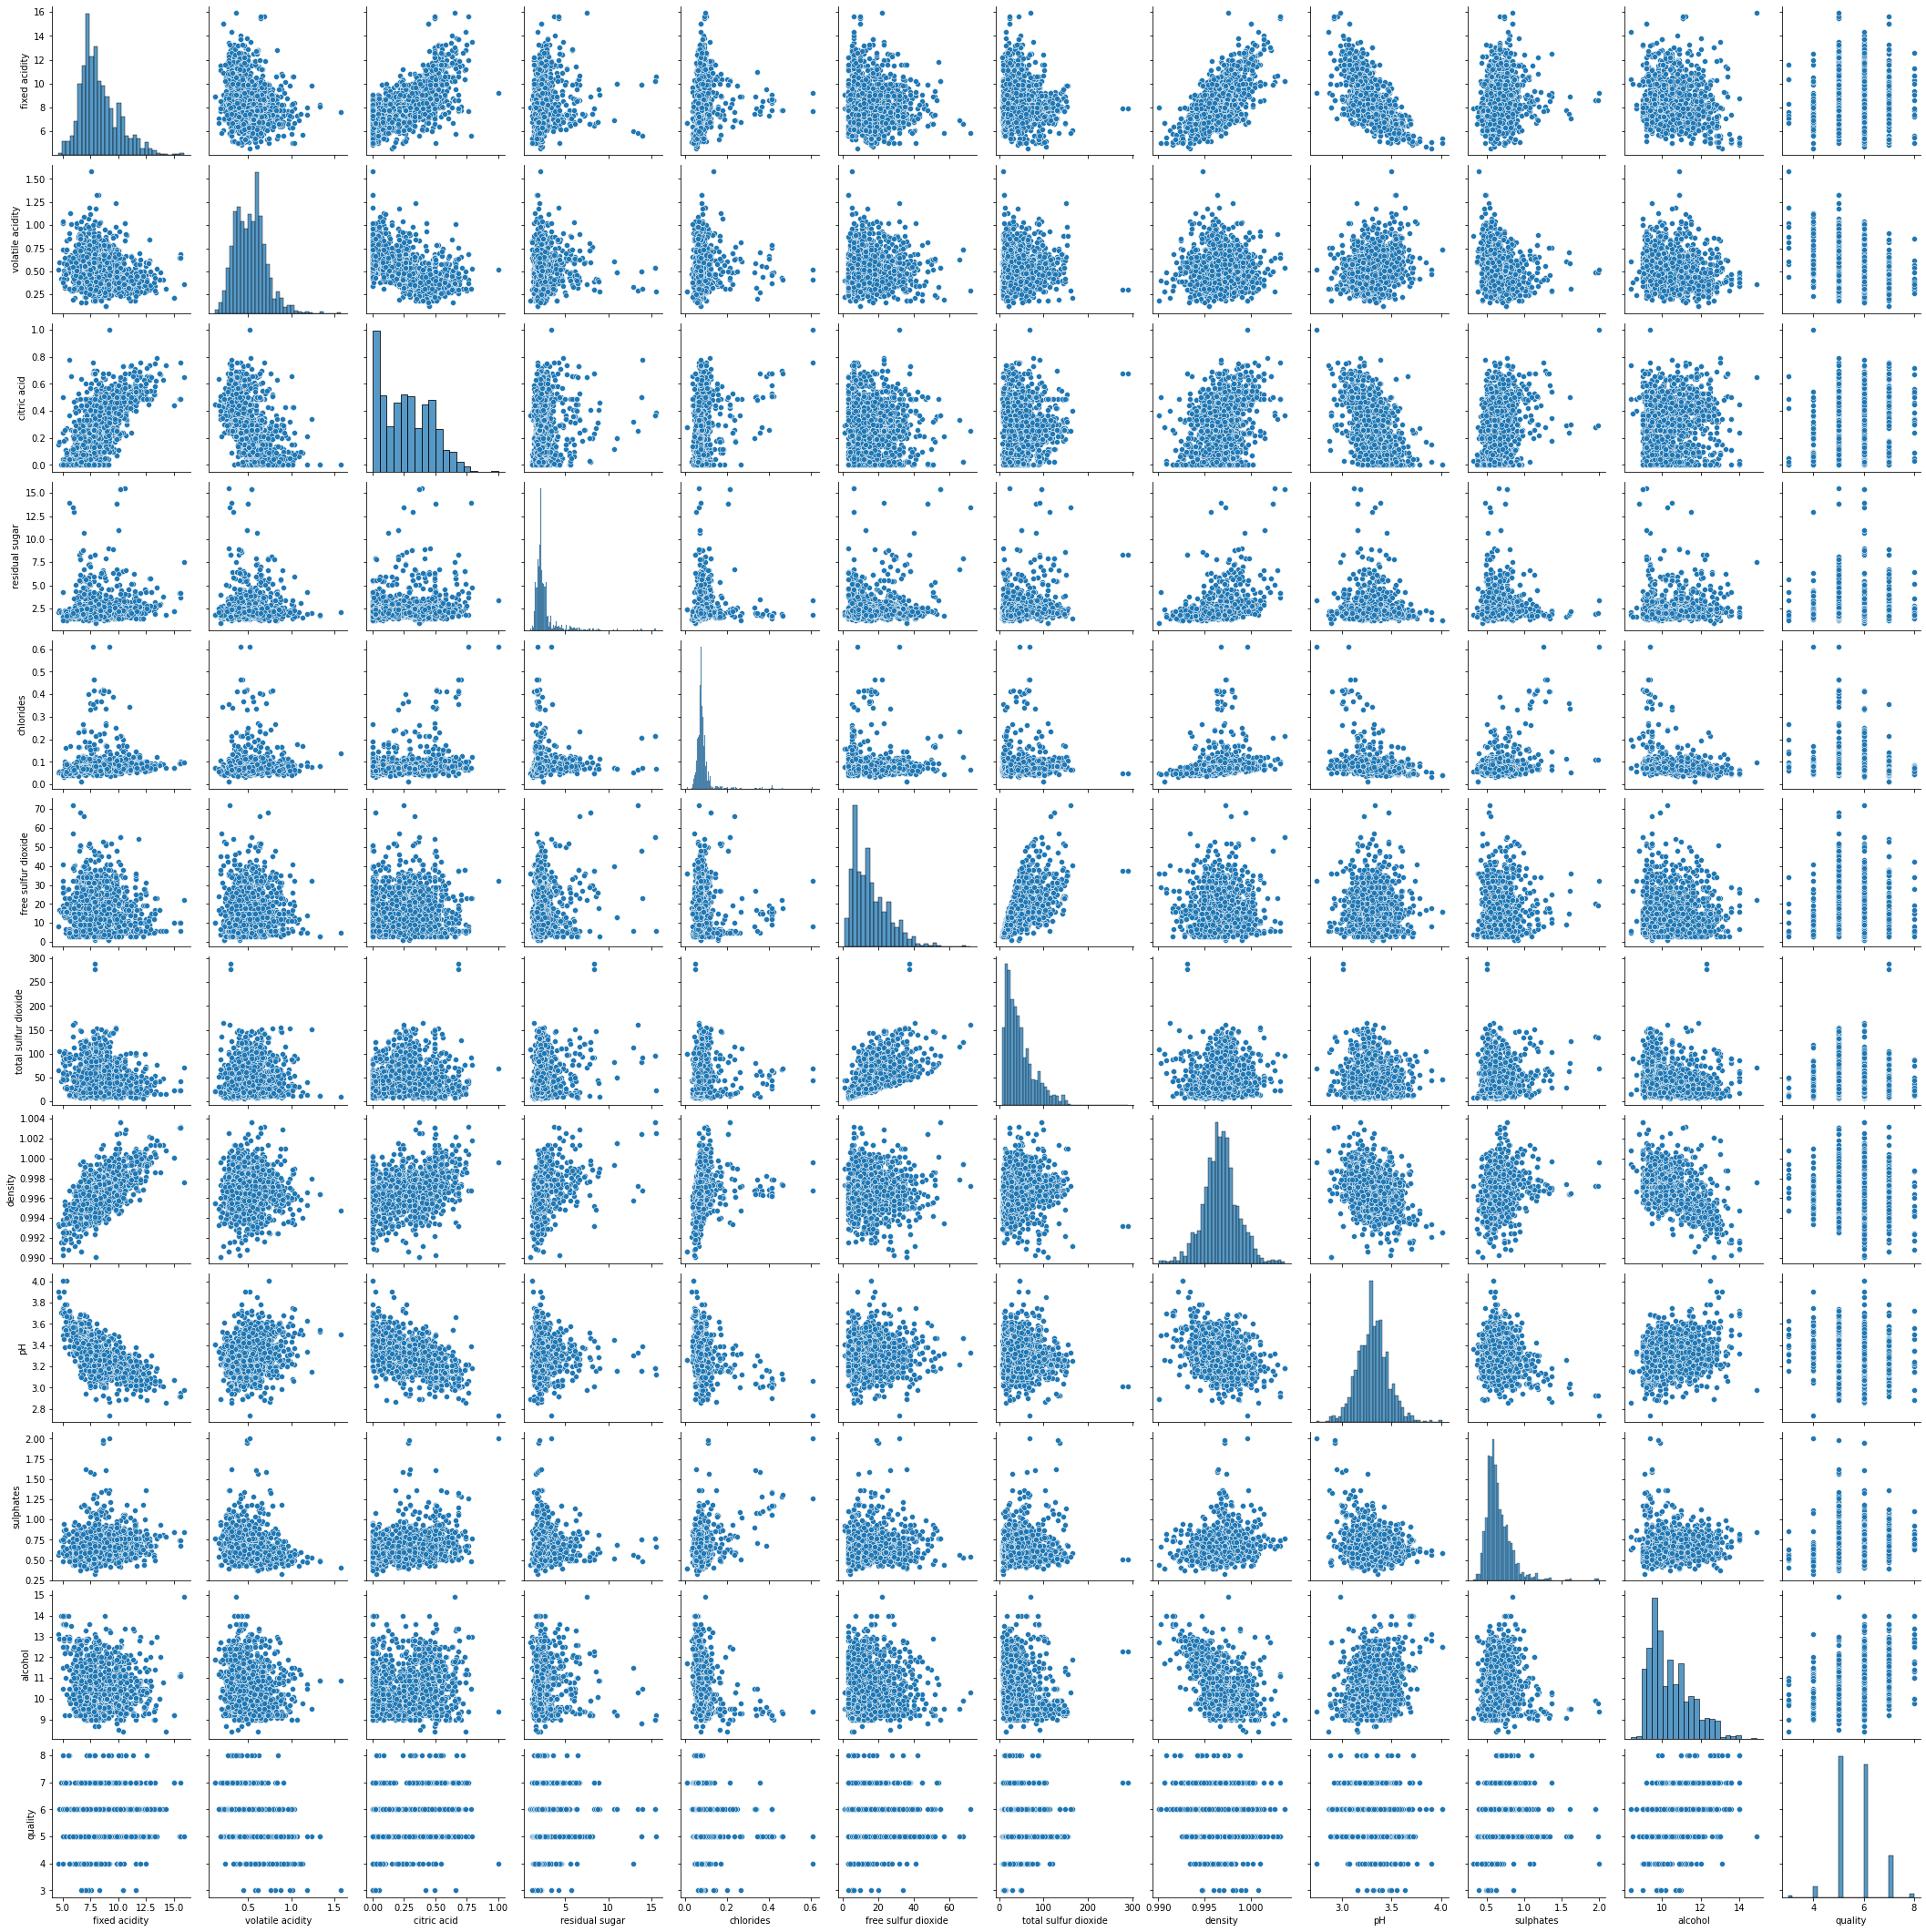

In [9]:
sns.pairplot(data)

In [10]:
train_dataset=data.sample(frac=0.8,random_state=0)
test_dataset=data.drop(train_dataset.index)

In [11]:
print(train_dataset.shape)
print(test_dataset.shape)

(1279, 12)
(320, 12)


In [12]:
train_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

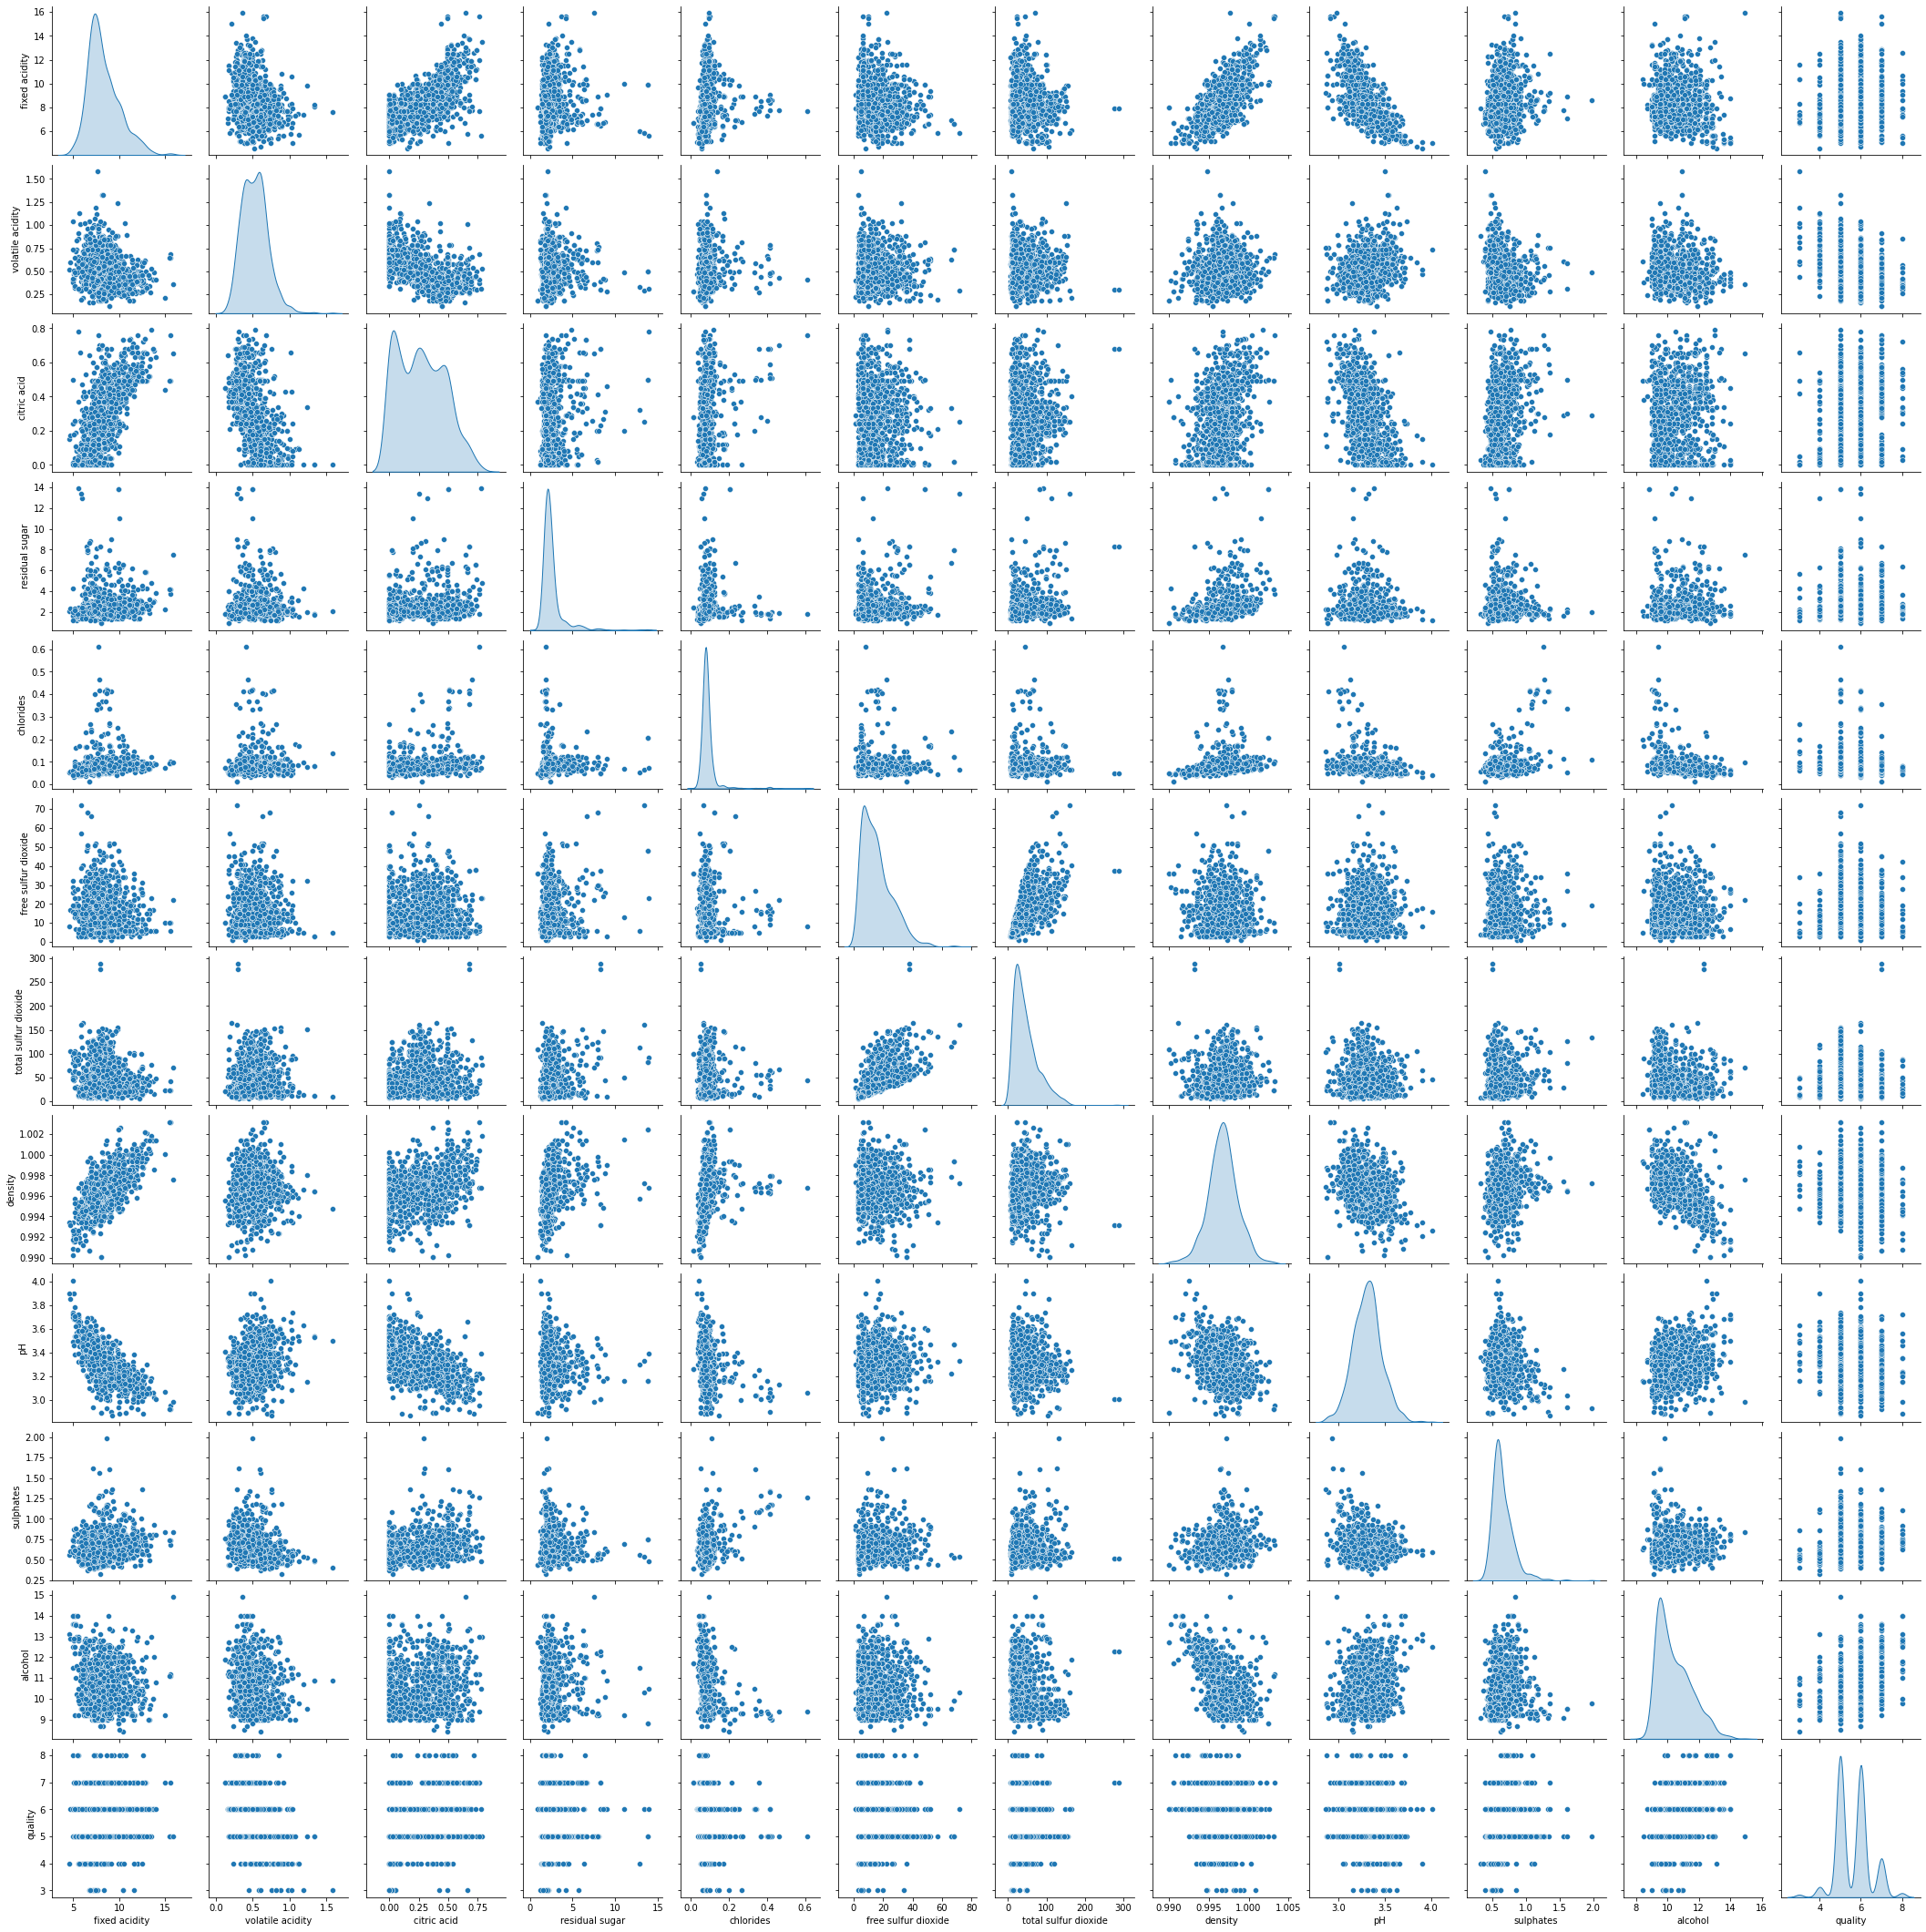

In [13]:
sns.pairplot(train_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']],diag_kind='kde')

In [14]:
train_stats=train_dataset.describe()
train_stats.pop('quality')
train_stats=train_stats.transpose()
train_stats

count       mean        std      min      25%  \
fixed acidity         1279.0   8.310164   1.744190  4.60000   7.1000   
volatile acidity      1279.0   0.525571   0.176645  0.12000   0.3900   
citric acid           1279.0   0.271618   0.196822  0.00000   0.0900   
residual sugar        1279.0   2.516341   1.300985  0.90000   1.9000   
chlorides             1279.0   0.087347   0.045666  0.01200   0.0710   
free sulfur dioxide   1279.0  15.868647  10.438880  1.00000   7.0000   
total sulfur dioxide  1279.0  46.488663  32.952841  6.00000  22.0000   
density               1279.0   0.996739   0.001888  0.99007   0.9956   
pH                    1279.0   3.312588   0.153923  2.87000   3.2100   
sulphates             1279.0   0.655012   0.160192  0.33000   0.5500   
alcohol               1279.0  10.436317   1.084177  8.40000   9.5000   

                           50%        75%       max  
fixed acidity          7.90000   9.250000   15.9000  
volatile acidity       0.52000   0.635000    1.5800  
citric acid            0.26000   0.430000    0.7900  
residual sugar         2.20000   2.600000   13.9000  
chlorides              0.07900   0.091000    0.6110  
free sulfur dioxide   14.00000  21.000000   72.0000  
total sulfur dioxide  38.00000  62.000000  289.0000  
density                0.99676   0.997855    1.0032  
pH                     3.31000   3.400000    4.0100  
sulphates              0.62000   0.730000    1.9800  
alcohol               10.20000  11.100000   14.9000

In [15]:
train_labels=train_dataset.pop('quality')
test_labels=test_dataset.pop('quality')

In [16]:
print(train_labels.shape)
print(test_labels.shape)

(1279,)
(320,)


In [17]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [18]:
len(train_dataset.keys())

11

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow import keras
import tensorflow as tf

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [26]:
def build_model():
    model=keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),## input layer
        layers.Dense(64,activation='relu'),## hidden layer
        layers.Dense(1)#output
        
      ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,metrics=['mae','mse'])
    return model

In [27]:
model=build_model()
model

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [29]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[-0.19026107],
       [ 0.42702067],
       [ 0.16600397],
       [-0.00335619],
       [ 0.06800052],
       [ 0.24978133],
       [ 0.36197197],
       [-0.22019552],
       [ 0.38413352],
       [ 0.3100715 ]], dtype=float32)

In [30]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:13.7639,  mae:3.4059,  mse:13.7639,  val_loss:4.5784,  val_mae:1.8133,  val_mse:4.5784,  
....................................................................................................
Epoch: 100, loss:0.1873,  mae:0.3349,  mse:0.1873,  val_loss:0.4384,  val_mae:0.5046,  val_mse:0.4384,  
....................................................................................................
Epoch: 200, loss:0.1227,  mae:0.2693,  mse:0.1227,  val_loss:0.4868,  val_mae:0.5278,  val_mse:0.4868,  
....................................................................................................
Epoch: 300, loss:0.0900,  mae:0.2295,  mse:0.0900,  val_loss:0.5453,  val_mae:0.5502,  val_mse:0.5453,  
....................................................................................................
Epoch: 400, loss:0.0672,  mae:0.2013,  mse:0.0672,  val_loss:0.5477,  val_mae:0.5491,  val_mse:0.5477,  
......................................................................

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

loss       mae        mse  val_loss   val_mae   val_mse  epoch
0  13.763864  3.405893  13.763864  4.578354  1.813296  4.578354      0
1   3.150888  1.430085   3.150888  2.629218  1.259791  2.629218      1
2   2.167790  1.140911   2.167790  1.919572  1.046458  1.919572      2
3   1.701256  1.024341   1.701256  1.478010  0.943516  1.478010      3
4   1.401183  0.930971   1.401183  1.409328  0.885715  1.409328      4

In [32]:
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
995  0.028825  0.136895  0.028825  0.670378  0.588354  0.670378    995
996  0.033420  0.135615  0.033420  0.648603  0.578999  0.648603    996
997  0.034462  0.149221  0.034462  0.666792  0.577381  0.666792    997
998  0.034107  0.144760  0.034107  0.692274  0.604830  0.692274    998
999  0.027027  0.131817  0.027027  0.680362  0.600845  0.680362    999

In [33]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter

Text(0, 0.5, 'MAE [quality]')

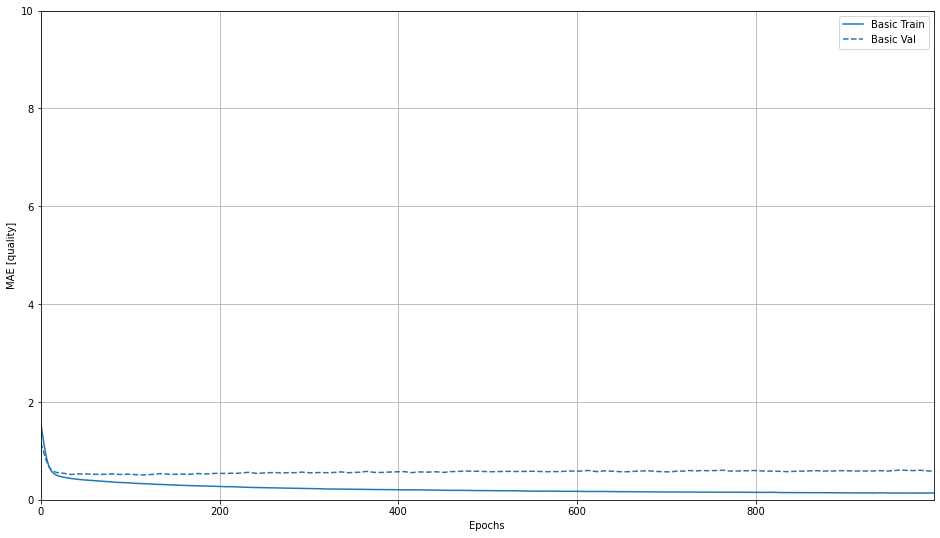

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [quality]')


Text(0, 0.5, 'MSE [quality^2]')

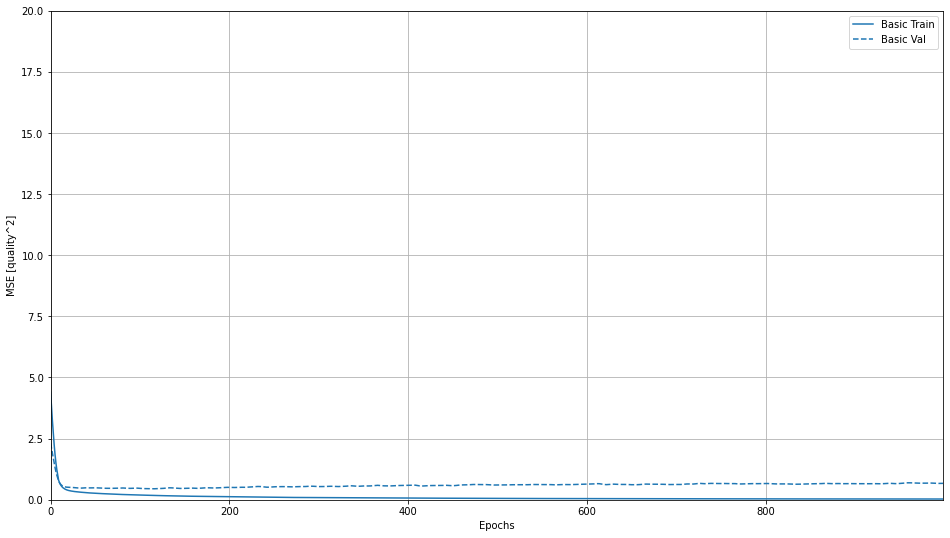

In [38]:
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [quality^2]')

In [36]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:14.9430,  mae:3.5742,  mse:14.9430,  val_loss:5.1567,  val_mae:1.9434,  val_mse:5.1567,  
.......................................

Text(0, 0.5, 'MAE [quality]')

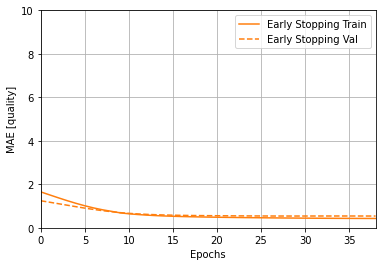

In [39]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [quality]')

In [40]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:10.2f} quality".format(mae))

10/10 - 0s - loss: 0.4306 - mae: 0.5051 - mse: 0.4306
Testing set Mean Abs Error:       0.51 quality


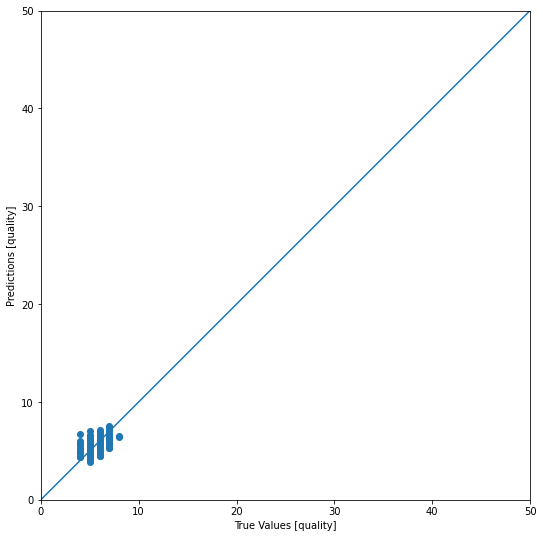

In [43]:
### Model Prediction
test_predictions = model.predict(normed_test_data).flatten()
plt.figure(figsize=(16,9))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

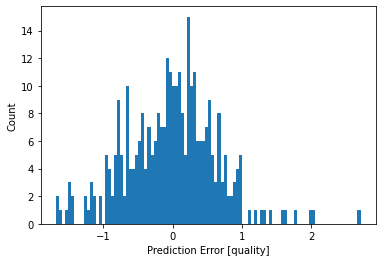

In [44]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [quality]")
_ = plt.ylabel("Count")